# Imports

In [1]:
import pandas as pd
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.time_utils import TimeProcessorBMM

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data

In [2]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
time_processor_bmm = TimeProcessorBMM(base_dir)
df = time_processor_bmm.get_data(sample_rate=0.1)

/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling/utils/time_utils.py:98: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfs = pd.concat(dfs, axis=0, ignore_index=True)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9326529 entries, 0 to 9326528
Data columns (total 8 columns):
 #   Column         Dtype   
---  ------         -----   
 0   kernel_params  object  
 1   dtype          category
 2   b              int64   
 3   n              int64   
 4   m              int64   
 5   p              int64   
 6   time           float64 
 7   gflops         float64 
dtypes: category(1), float64(2), int64(4), object(1)
memory usage: 507.0+ MB


In [7]:
# Lots of values are nan!
df.isna().sum()

kernel_params          0
dtype                  0
b                      0
n                      0
m                      0
p                      0
time             2755950
gflops                 0
dtype: int64

# Gflops

<AxesSubplot:>

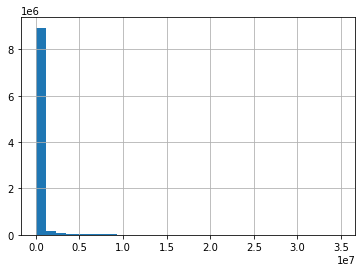

In [4]:
df['gflops'].hist(bins=30)

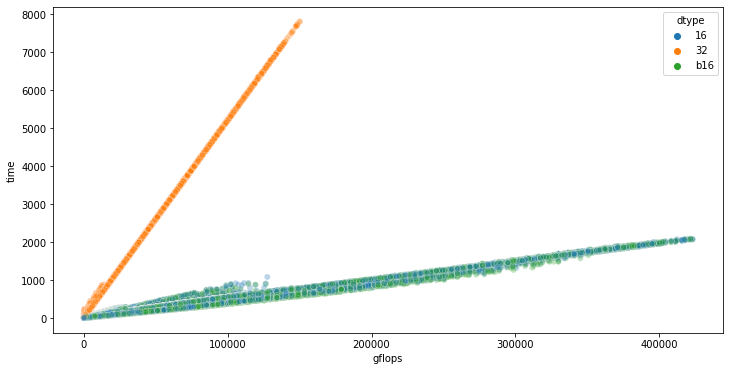

In [5]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.3, data=df)
plt.show()

In [6]:
df.groupby("dtype")[["gflops", "time"]].corr()

/var/folders/c8/q9xddvxj5pv262qffnm05sk00000gn/T/ipykernel_14336/310776800.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("dtype")[["gflops", "time"]].corr()


gflops      time
dtype                           
16    gflops  1.000000  0.986244
      time    0.986244  1.000000
32    gflops  1.000000  0.996725
      time    0.996725  1.000000
b16   gflops  1.000000  0.984970
      time    0.984970  1.000000

# Smaller flops?

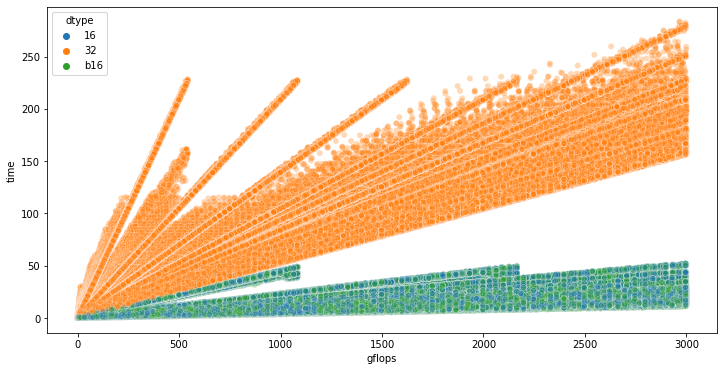

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.3, data=df.query("gflops < 3000"))
plt.show()